In [138]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [46]:
boston = load_boston()

In [117]:
X, y = boston.data, boston.target

In [119]:
X.shape

(506, 13)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [199]:
#delim = int(y.shape[0] * 0.75)
#X_train, X_test = X[:delim, :], X[delim:, :]
#y_train, y_test = y[:delim], y[delim:]

In [171]:
def derivative(y, z):
    l = y.shape[0]
    return (z - y)

In [172]:
def gbm_predict(X):
    return [
        sum([coeff * algo.predict([x])[0] 
        for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X
        ]

In [173]:
base_algorithms_list = []
coefficients_list = []

target = y_train

for i in range(50):
    estimator = DecisionTreeRegressor(max_depth=5, random_state=42)
    estimator.fit(X_train, target)
    base_algorithms_list.append(estimator)
    coefficients_list.append(0.9)
    target = -derivative(y_train, gbm_predict(X_train))
    if i % 10 == 0:
        print(mean_squared_error(y_train, gbm_predict(X_train)) ** 0.5)
print(mean_squared_error(y_train, gbm_predict(X_train)) ** 0.5)

3.5116385715360714
0.3820670062886278
0.091835715458719
0.02839183947273101
0.008107473713643353
0.002584474299324061


In [174]:
ans = mean_squared_error(y_test, gbm_predict(X_test)) ** 0.5
with open('boosting2.txt', 'w') as f:
    f.write(str(ans))
ans

5.455565103009402

In [175]:
base_algorithms_list = []
coefficients_list = []

target = y_train

for i in range(50):
    estimator = DecisionTreeRegressor(max_depth=5, random_state=42)
    estimator.fit(X_train, target)
    base_algorithms_list.append(estimator)
    coefficients_list.append(0.9 / (1.0 + i))
    target = -derivative(y_train, gbm_predict(X_train))
    if i % 10 == 0:
        print(mean_squared_error(y_train, gbm_predict(X_train)) ** 0.5)
print(mean_squared_error(y_train, gbm_predict(X_train)) ** 0.5)

ans = mean_squared_error(y_test, gbm_predict(X_test)) ** 0.5
with open('boosting3.txt', 'w') as f:
    f.write(str(ans))
ans

3.5116385715360714
1.2647753975986
1.0741774556748842
0.9990612946079998
0.9551179008876733
0.9282663207292292


4.812550945781193

In [176]:
import xgboost as xgb

def xgb_estimators_score(x):
    estim = xgb.XGBRegressor(max_depth=5, random_state=42, n_estimators=x)
    estim.fit(X_train, y_train)
    return mean_squared_error(y_test, estim.predict(X_test))

In [177]:
%matplotlib inline
import matplotlib.pyplot as plt

CPU times: user 540 ms, sys: 0 ns, total: 540 ms
Wall time: 539 ms


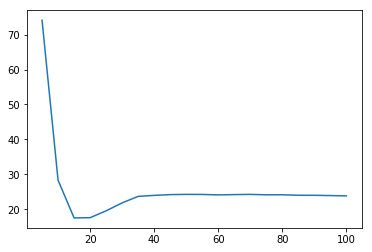

In [178]:
%%time
n_estimators = np.arange(5, 101, 5)
plt.plot(n_estimators, list(map(xgb_estimators_score, n_estimators)))

In [179]:
def xgb_depth_score(x):
    estim = xgb.XGBRegressor(max_depth=x, random_state=42, n_estimators=50)
    estim.fit(X_train, y_train)
    return mean_squared_error(y_test, estim.predict(X_test))

CPU times: user 1.74 s, sys: 4.01 ms, total: 1.75 s
Wall time: 1.75 s


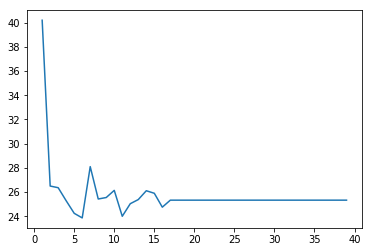

In [180]:
%%time
depths = np.arange(1, 40)
plt.plot(depths, list(map(xgb_depth_score, depths)))

In [181]:
with open('boosting4.txt', 'w') as f:
    f.write('2 3')

In [198]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
ans = mean_squared_error(y_test, regressor.predict(X_test)) ** 0.5

with open('boosting5.txt', 'w') as f:
    f.write(str(ans))
ans

8.254979753549158